
1. Add Stock
2. Remove Stock
3. Track Performance
4. Plot Portfolio
5. Exit


Enter your choice:  1
Enter stock symbol:  a
Enter number of shares:  3


3 shares of A added to portfolio.

1. Add Stock
2. Remove Stock
3. Track Performance
4. Plot Portfolio
5. Exit


Enter your choice:  1
Enter stock symbol:  B
Enter number of shares:  4


4 shares of B added to portfolio.

1. Add Stock
2. Remove Stock
3. Track Performance
4. Plot Portfolio
5. Exit


Enter your choice:  3


Portfolio performance:
Total investment: 585.1299896240234
Current value: 182.65999603271484
Profit/Loss: -402.4699935913086

1. Add Stock
2. Remove Stock
3. Track Performance
4. Plot Portfolio
5. Exit


Enter your choice:  4


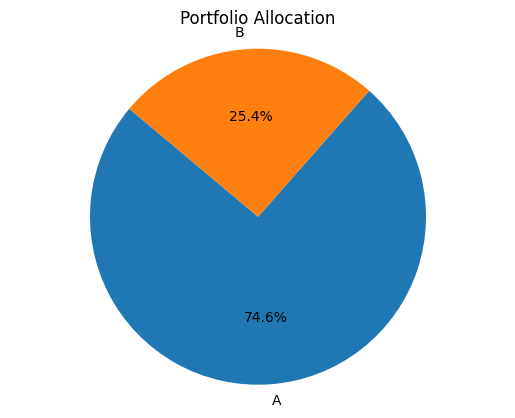


1. Add Stock
2. Remove Stock
3. Track Performance
4. Plot Portfolio
5. Exit


Enter your choice:  5


Exiting program.


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

class StockPortfolio:
    def __init__(self):
        self.portfolio = {}

    def add_stock(self, symbol, shares):
        if symbol in self.portfolio:
            self.portfolio[symbol] += shares
        else:
            self.portfolio[symbol] = shares

    def remove_stock(self, symbol, shares):
        if symbol in self.portfolio:
            if shares >= self.portfolio[symbol]:
                del self.portfolio[symbol]
            else:
                self.portfolio[symbol] -= shares

    def track_performance(self):
        total_investment = 0
        current_value = 0

        for symbol, shares in self.portfolio.items():
            stock = yf.Ticker(symbol)
            current_price = stock.history(period="1d")["Close"].iloc[-1]
            total_investment += shares * current_price
            current_value += current_price

        return total_investment, current_value

    def plot_portfolio(self):
        labels = []
        sizes = []

        for symbol, shares in self.portfolio.items():
            stock = yf.Ticker(symbol)
            current_price = stock.history(period="1d")["Close"].iloc[-1]
            labels.append(symbol)
            sizes.append(shares * current_price)

        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.title('Portfolio Allocation')
        plt.show()

# Initialize portfolio
portfolio = StockPortfolio()

# Interactive menu
while True:
    print("\n1. Add Stock")
    print("2. Remove Stock")
    print("3. Track Performance")
    print("4. Plot Portfolio")
    print("5. Exit")
    choice = input("Enter your choice: ")

    if choice == '1':
        symbol = input("Enter stock symbol: ").upper()
        shares = int(input("Enter number of shares: "))
        portfolio.add_stock(symbol, shares)
        print(f"{shares} shares of {symbol} added to portfolio.")

    elif choice == '2':
        symbol = input("Enter stock symbol: ").upper()
        shares = int(input("Enter number of shares to remove: "))
        portfolio.remove_stock(symbol, shares)
        print(f"{shares} shares of {symbol} removed from portfolio.")

    elif choice == '3':
        total_investment, current_value = portfolio.track_performance()
        print("Portfolio performance:")
        print("Total investment:", total_investment)
        print("Current value:", current_value)
        print("Profit/Loss:", current_value - total_investment)

    elif choice == '4':
        portfolio.plot_portfolio()

    elif choice == '5':
        print("Exiting program.")
        break

    else:
        print("Invalid choice. Please enter a number between 1 and 5.")
